# Predicting wine quality

In this notebook we will be using wine data from kaggle to predict sommelier (human) wine quality scores.

# Set up

We start by importing all the code libraries we will use to complete this task:


*   Pandas: a Python-based data manipulation and analysis library that providing data structures like DataFrames, which help us handle structured data more efficiently.
*   NumPy: supports large multi-dimensional arrays and provides mathematical functions to perform operations on these arrays efficiently.
*   Sklearn: widely used machine learning library in Python that provides simple and efficient tools for data preprocessing, classification, regression, clustering, and model evaluation, built on top of NumPy, SciPy, and Matplotlib.
*   Sklearn/train_test_split: splits a dataset into training and testing subsets, allowing for better evaluation of machine learning models.
*  Sklearn/StandardScaler: standardizes numerical data by scaling it to have a mean of 0 and a standard deviation of 1.
*  Tensorflow: deep learning framework developed by Google, designed for building and training machine learning models, especially deep neural networks, with support for GPU acceleration and scalable deployment.
*  Tensorflow/Sequential and Dense: Tensorflow lets you build a machine learning model layer by layer. Sequential is a linear stack of layers in Keras (TensorFlow’s deep learning API), and Dense is a layer where each neuron is connected to every neuron in the previous layer.
*  Tensorflow/to_categorical: converts integer labels into one-hot encoded format, which is useful for multi-class classification problems in deep learning.

In [1]:
import sys

print("Python version:", sys.version)


Python version: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

We then download the data from the archive link below. I'm using this link because it helpfully directs to a csv file of the data provided by the Donald Bren School of Information and Computer Sciences, although I could also download from kaggle:


*   https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

!: The exclamation mark is used in Jupyter Notebook or Google Colab to execute a shell command (i.e., a command that would normally be run in a terminal)

wget: a command-line utility that allows you to download files from the internet.

-O: specifies the output file name (winequality-red.csv).

In [3]:
!wget -O winequality-red.csv https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2025-04-30 10:53:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv’

winequality-red.csv     [ <=>                ]  82.23K   453KB/s    in 0.2s    

2025-04-30 10:53:45 (453 KB/s) - ‘winequality-red.csv’ saved [84199]



Next we convert the wine quality table from csv to a pandas dataframe, which by convention we usually store in the variable df.

In [4]:
df = pd.read_csv("winequality-red.csv", delimiter=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# Data processing

To ensure our output is valid, we need to make sure our input data is good quality. This means we need to do some preprocessing steps to transform the data into the right format and make sure it is statistically balanced.

First, we define our X and Y variables. X is our training set and Y is our validation set. Since we are trying to predict quality, we make the 'quality column' our Y, and everything else our X.

In [5]:
X = df.drop(columns=["quality"])
y = df["quality"]

We one-hot encode the target variable, which means converting the labels into a format where each class has its own column with a 1 in the corresponding class and 0s elsewhere. This is useful for multi-class classification problems where the model needs to learn to distinguish between multiple categories. By subtracting y.min(), we shift the class labels so that they start from 0 (e.g., if the smallest label is 3, then 3 becomes 0, 4 becomes 1, etc.).

In [6]:
y = to_categorical(y - y.min())

We then scale the values to have a mean of 0 and standard deviation of 1. Many machine learning algorithms perform better when numerical features are standardized, especially methods that rely on distance and it prevents features with large values from dominating the learning process.

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We then use the prebuilt function train_test_split to split the dataset randomly such that our training set is 80% of the data and the test set is the remaining 20%.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and train the model

Next we build the model. Below we have a three later model. The first layer is made up of 64 neurons, the second layer has 32, and the last layer is a softmax function that assigns probabilities to each possible class. The model outputs a probability distribution over all possible categories.

In [9]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation="relu"),
    Dense(32, activation="relu"),
    Dense(y_train.shape[1], activation="softmax")
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This line configures the neural network for training by specifying how it should learn and evaluate performance.

In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

This line trains the neural network using the training data and records the learning progress.

In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4176 - loss: 1.5496 - val_accuracy: 0.5938 - val_loss: 1.0664
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5418 - loss: 1.0889 - val_accuracy: 0.6250 - val_loss: 0.9364
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5741 - loss: 1.0515 - val_accuracy: 0.6719 - val_loss: 0.8936
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6231 - loss: 0.9352 - val_accuracy: 0.6484 - val_loss: 0.8873
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6077 - loss: 0.9713 - val_accuracy: 0.6914 - val_loss: 0.8663
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6147 - loss: 0.9629 - val_accuracy: 0.6680 - val_loss: 0.8636
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6225 - loss: 0.9301 - val_accuracy: 0.6602 - val_loss: 0.8646
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6159 - loss: 0.9181 - val_accuracy: 0.6719 - val_loss:

This line tests the trained model on new data to see how well it performs.

In [12]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.55


# Visualise the results

We can now visualize the training process and compare the training and validation results.

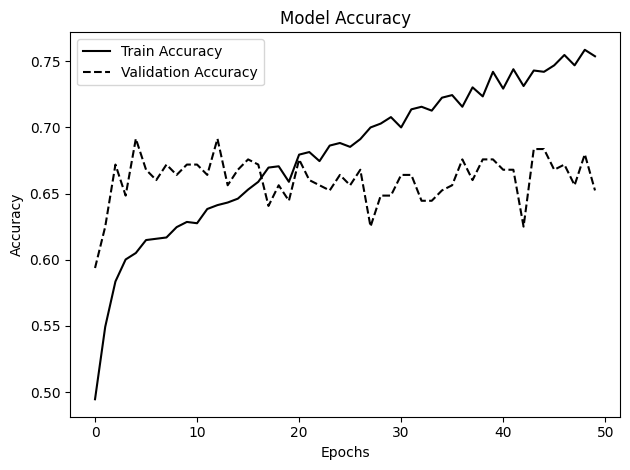

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy', linestyle='solid', color='black')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed', color='black')

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


If you're interested in playing around with what we've developed you can get all the weights as a list of tensors and see what kinds of values the model is working with. I recommend you unpick all the code and see how it works!


In [14]:
weights = model.get_weights()

for i, weight in enumerate(weights):
    print(f"Weight {i}: \n{weight}\n")

Weight 0: 
[[ 0.16399421 -0.07034149 -0.03964319  0.19562338  0.073213   -0.32441857
   0.24424459 -0.01957425 -0.08410162  0.32629696 -0.03165778 -0.11983673
  -0.19587319 -0.00220556  0.11453666  0.21324454 -0.22522159  0.28507692
   0.2607498   0.0023984  -0.27545494 -0.17983998  0.1929724   0.2585552
   0.15761435  0.19268069 -0.2691305   0.13276514  0.09157643 -0.2756082
   0.00509567 -0.05560265 -0.05711553  0.20949844 -0.37044454  0.26045814
   0.01557658 -0.33916992 -0.00127005  0.16785288  0.18530679  0.09874848
  -0.2126825  -0.39158443 -0.10836846 -0.31003052  0.19785674 -0.14630204
  -0.21370406 -0.26772174 -0.06476577  0.17242004 -0.4187336   0.21601476
  -0.0690405   0.15030947 -0.1721929   0.26517436  0.11878901 -0.0761785
  -0.3849921  -0.24841878 -0.26251197  0.5185666 ]
 [-0.3354012  -0.04622158  0.09103531 -0.53075355  0.18867914  0.2584345
  -0.1481334   0.3287359  -0.12721759  0.19077745  0.16399936 -0.11766649
   0.29942048 -0.59752274 -0.18415922 -0.28416762 -0.1

In [15]:
model.save('wine_model.h5')
